In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
customer = pd.read_csv('/content/customer_join.csv')
uselog_months = pd.read_csv('/content/use_log_months.csv')

In [3]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,종일,10500,일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,종일,10500,일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,종일,10500,일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,종일,10500,일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,야간,6000,일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,종일,10500,일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,종일,10500,일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,야간,6000,일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,종일,10500,일반,11.000000,11.0,11,11,0,2019-04-30,1


In [4]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [5]:
list(uselog_months["연월"].unique())

[201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903]

- 2달치 데이터를 쓴것 > 결론의 데이터(이게 나오기까지 엄청난 시행착오 trial and error 과정이 있었을것! 해보니 그렇다고 하심)
- 개월수가 더 많아도.. noise가 될 가능성이 큼..

In [7]:
year_months = list(uselog_months["연월"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):   # 1-11 까지 11바퀴 > 그달&그전달(11번이면 됨)
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]] #i=1(year_months[i]=201805)
    tmp.rename(columns={"count":"count_0"}, inplace=True)  #컬럼 제목 변경 - tmp(temporal한 df)는 uselog_month컬럼 가지고 있음! /// rename은 파라미터로 딕셔너리로 씀!(pair니까!)
    tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-1]]  #i-1=0 :4월 데이터를 가져와서 count_0에 입력
    del tmp_before["연월"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True) # for문 돌리며 밑으로 쭉 붙여버림! / merge..를 해줘서 nan가 많을듯..
uselog

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0
...,...,...,...,...
33846,201903,TS995853,8,11.0
33847,201903,TS998593,8,7.0
33848,201903,TS999079,3,2.0
33849,201903,TS999231,6,6.0


1. uselog_months 데이터셋에서 201805월 이후로 한달치씩 데이터를 가져와서 tmp에 넣는다.
2. tmp의 count 컬럼을 count_0로 이름 변경
3. uselog_months 데이터셋에서 201804월 이후로 한달치씩 데이터를 가져와서 tmp_before에 넣는다.
4. tmp_before에서 연월 데이터를 삭제
5. tmp_before의 count 컬럼을 count_1로 이름 변경
6. 5월의 회원별 이용횟수 데이터가 들어있는  tmp 파일에 4월 데이터가 들어있는 tmp_before 파일을 
고객 id를 기준으로 통합(MERGE)
7. tmp 데이터를 비어있는 uselog 데이터에 합친다(concat)

In [12]:
customer.info() # df만들때 datetime type으로 만들어도 csv파일을 다시 불러오면 대부분 object임..! pd.to_datetime해주자!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

In [13]:
from dateutil.relativedelta import relativedelta  #relativedelta 모듈 임포트 (특정 시점 비교해서 차이값 등을 만들어줌 / 생긴데이터..년월일시분초 6개..datetime)
exit_customer = customer.loc[customer["is_deleted"]==1]  #탈퇴가 완료된(is_deleted==1)인 데이터를 가져와서 exit_customer에 넣는다.
exit_customer["exit_date"] = None  # exit_customer데이터셋에 exit_date 컬럼을 만들고 null 값을 채워준다.
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"]) # exit_customer데이터셋의 end_date를 to_datetime으로 변경한다.

# 우리는 탈퇴가 완료된 날짜, 시점이 아니라 '탈퇴를 신청한 날짜'가 필요! - 그 전달 필요..

for i in range(len(exit_customer)):   #exit_customer갯수만큼(1350회) 반복문 실행
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1) #exit_customer의 i번째 exit_date 값을 end_date에서 한달을 뺀 값으로 넣는다. 
exit_customer["연월"] = pd.to_datetime(exit_customer["exit_date"]).dt.strftime("%Y%m") # exit_customer의 연뤌 컬럼에 탈퇴일자를 월단위로 변환하여 넣는다.
uselog["연월"] = uselog["연월"].astype(str) #uselog의 연월 데이터를 문자값으로 바꿔준다.
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how="left") #exit_uselog 데이터셋을 만들어서 전체고객의 uselog 데이터에 탈퇴월을 기준으로 고객데이터를 결합한다. 
# exit_uselog에는 유지된 회원들은 nan값! (탈퇴한 회원 정보니까..)
print(len(uselog))

33851


In [18]:
exit_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,연월
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,종일,10500,일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,주간,7500,일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,종일,10500,일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30 00:00:00,201803
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,야간,6000,일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30 00:00:00,201804
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,종일,10500,일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30 00:00:00,201804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,야간,6000,일반,4.5,4.5,6,3,0,2019-02-28,1,2019-01-28 00:00:00,201901
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,종일,10500,일반,7.0,6.0,12,3,0,2019-03-31,2,2019-02-28 00:00:00,201902
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,주간,7500,일반,7.0,7.0,11,3,0,2019-03-31,1,2019-02-28 00:00:00,201902
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,야간,6000,일반,7.0,7.0,10,4,0,2019-03-31,1,2019-02-28 00:00:00,201902


In [17]:
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
len(exit_uselog.loc[exit_uselog["is_deleted"]==1]) # 우리는 이 데이터를 학습할거임! 탈퇴한 고객들이니까!!

1104

- 지금 클래스 차이거 너무 큼 / 유지고객:탈퇴고객=11:1 >> 그럼 학습이 잘 안됨! 그래서 섞어서 학습하든 여러 처리가 필요함!

In [20]:
exit_uselog = exit_uselog.dropna(subset=["name"]) # exit_uselog 에서 name을 기준으로 결측데이터를 삭제한다. 
print(len(exit_uselog)) #탈퇴고객들의 2개월간 이용 데이터.
print(len(exit_uselog["customer_id"].unique())) #남아있는데이터를 customer_id를 기준으로 유니크 값의 갯수를 출력한다.
exit_uselog.head()

1104
1104


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


In [21]:
conti_customer = customer.loc[customer["is_deleted"]==0]  # customer데이터중 탈퇴하지 않은 고객(["is_deleted"]==0)을 conti_customer에 넣는다.
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left") #conti_uselog 데이터셋을 만들어서 전체고객의 uselog 데이터에 customer_id를 기준으로 고객데이터를 결합한다.
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=["name"]) #name을 기준으로 결측치를 제가한다. 
print(len(conti_uselog))

33851
27422


In [22]:
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True) #conti_uselog 데이터의 인덱스를 리셋한다.
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id") # customer_id를 기준으로 중복을제가한다. 
print(len(conti_uselog)) # 현재 유지되고 있는 고객의 수와 같음
conti_uselog.head()

2842


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201806,HD436260,4,8.0,XXXX,C02,M,2016-11-01,NaN,CA1,...,주간,7500.0,일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,29.0
1,201805,OA025439,3,7.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,종일,10500.0,일반,4.583333,4.0,8.0,2.0,1.0,2019-04-30,45.0
2,201812,AS587750,4,5.0,XXXXXX,C03,M,2016-08-01,NaN,CA1,...,야간,6000.0,일반,4.833333,5.0,9.0,1.0,1.0,2019-04-30,32.0
3,201806,HD921002,4,7.0,XXXX,C03,F,2016-04-01,NaN,CA1,...,야간,6000.0,일반,4.916667,5.0,7.0,2.0,1.0,2019-04-30,36.0
4,201812,TS128180,6,2.0,XX,C03,M,2016-09-01,NaN,CA1,...,야간,6000.0,일반,3.916667,4.0,6.0,2.0,1.0,2019-04-30,31.0


In [23]:
conti_uselog.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               201
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [24]:
predict_data = pd.concat([conti_uselog, exit_uselog],ignore_index=True)  #학습에 쓸 데이터를 predict_data로 만들고 conti_uselog와 exit_uselog를 결합한다.
print(len(predict_data))
predict_data.head()

3946


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201806,HD436260,4,8.0,XXXX,C02,M,2016-11-01,NaT,CA1,...,7500.0,일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,29.0,NaN
1,201805,OA025439,3,7.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,10500.0,일반,4.583333,4.0,8.0,2.0,1.0,2019-04-30,45.0,NaN
2,201812,AS587750,4,5.0,XXXXXX,C03,M,2016-08-01,NaT,CA1,...,6000.0,일반,4.833333,5.0,9.0,1.0,1.0,2019-04-30,32.0,NaN
3,201806,HD921002,4,7.0,XXXX,C03,F,2016-04-01,NaT,CA1,...,6000.0,일반,4.916667,5.0,7.0,2.0,1.0,2019-04-30,36.0,NaN
4,201812,TS128180,6,2.0,XX,C03,M,2016-09-01,NaT,CA1,...,6000.0,일반,3.916667,4.0,6.0,2.0,1.0,2019-04-30,31.0,NaN


In [25]:
predict_data.dtypes

연월                           object
customer_id                  object
count_0                       int64
count_1                     float64
name                         object
class                        object
gender                       object
start_date                   object
end_date             datetime64[ns]
campaign_id                  object
is_deleted                  float64
class_name                   object
price                       float64
campaign_name                object
mean                        float64
median                      float64
max                         float64
min                         float64
routine_flg                 float64
calc_date                    object
membership_period           float64
exit_date                    object
dtype: object

In [26]:
predict_data.shape

(3946, 22)

In [27]:
predict_data["period"] = 0 #predict_data애 period(재적기간) 컬럼을 만든다.
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m") #predict_data에 now_date컬럼을 만들고 연월을 넣어준다.
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])  #predict_data에start_date컬럼을 만들고 start_date를 datetime으로 바꾸어서 넣어준다.
for i in range(len(predict_data)): #전체 데이터 숫자만큼 반복
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i]) #시작일과 기준일 사이의 차이를 구한다.
    predict_data["period"][i] = int(delta.years*12 + delta.months)  #결과값의 연*12, 월차이를 더해서 숫자로 변환하여 저장
predict_data.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,HD436260,4,8.0,XXXX,C02,M,2016-11-01,NaT,CA1,...,4.666667,5.0,8.0,1.0,1.0,2019-04-30,29.0,NaN,19,2018-06-01
1,201805,OA025439,3,7.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,4.583333,4.0,8.0,2.0,1.0,2019-04-30,45.0,NaN,34,2018-05-01
2,201812,AS587750,4,5.0,XXXXXX,C03,M,2016-08-01,NaT,CA1,...,4.833333,5.0,9.0,1.0,1.0,2019-04-30,32.0,NaN,28,2018-12-01
3,201806,HD921002,4,7.0,XXXX,C03,F,2016-04-01,NaT,CA1,...,4.916667,5.0,7.0,2.0,1.0,2019-04-30,36.0,NaN,26,2018-06-01
4,201812,TS128180,6,2.0,XX,C03,M,2016-09-01,NaT,CA1,...,3.916667,4.0,6.0,2.0,1.0,2019-04-30,31.0,NaN,27,2018-12-01


In [28]:
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               253
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [29]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2641
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2641
period                  0
now_date                0
dtype: int64

In [30]:
predict_data.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,HD436260,4,8.0,XXXX,C02,M,2016-11-01,NaT,CA1,...,4.666667,5.0,8.0,1.0,1.0,2019-04-30,29.0,NaN,19,2018-06-01
1,201805,OA025439,3,7.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,4.583333,4.0,8.0,2.0,1.0,2019-04-30,45.0,NaN,34,2018-05-01
2,201812,AS587750,4,5.0,XXXXXX,C03,M,2016-08-01,NaT,CA1,...,4.833333,5.0,9.0,1.0,1.0,2019-04-30,32.0,NaN,28,2018-12-01
3,201806,HD921002,4,7.0,XXXX,C03,F,2016-04-01,NaT,CA1,...,4.916667,5.0,7.0,2.0,1.0,2019-04-30,36.0,NaN,26,2018-06-01
4,201812,TS128180,6,2.0,XX,C03,M,2016-09-01,NaT,CA1,...,3.916667,4.0,6.0,2.0,1.0,2019-04-30,31.0,NaN,27,2018-12-01


In [31]:
predict_data.columns

Index(['연월', 'customer_id', 'count_0', 'count_1', 'name', 'class', 'gender',
       'start_date', 'end_date', 'campaign_id', 'is_deleted', 'class_name',
       'price', 'campaign_name', 'mean', 'median', 'max', 'min', 'routine_flg',
       'calc_date', 'membership_period', 'exit_date', 'period', 'now_date'],
      dtype='object')

In [32]:
predict_data.shape

(3693, 24)

In [33]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head() # is_deleted는 y값으로 분리하면 될듯(target)

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,일반,주간,M,8.0,1.0,19,0.0
1,일반,종일,M,7.0,1.0,34,0.0
2,일반,야간,M,5.0,1.0,28,0.0
3,일반,야간,F,7.0,1.0,26,0.0
4,일반,야간,M,2.0,1.0,27,0.0


In [34]:
predict_data.is_deleted.value_counts()

0.0    2641
1.0    1052
Name: is_deleted, dtype: int64

In [35]:
predict_data = pd.get_dummies(predict_data) # get_dummies >> one-hot encoding (근데 요즘에 one-hot encoder 씀), 근데 get_dummies굉장히 편리!(컬럼명 알아서 맞춰줌. 자동으로 오리지널 변수명 뒤에 클래스 명 이쁘게 잘 생성해줌)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_일반,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_야간,class_name_종일,class_name_주간,gender_F,gender_M
0,8.0,1.0,19,0.0,1,0,0,0,0,1,0,1
1,7.0,1.0,34,0.0,1,0,0,0,1,0,0,1
2,5.0,1.0,28,0.0,1,0,0,1,0,0,0,1
3,7.0,1.0,26,0.0,1,0,0,1,0,0,1,0
4,2.0,1.0,27,0.0,1,0,0,1,0,0,0,1


In [36]:
del predict_data["campaign_name_일반"]
del predict_data["class_name_야간"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_종일,class_name_주간,gender_F
0,8.0,1.0,19,0.0,0,0,0,1,0
1,7.0,1.0,34,0.0,0,0,1,0,0
2,5.0,1.0,28,0.0,0,0,0,0,0
3,7.0,1.0,26,0.0,0,0,0,0,1
4,2.0,1.0,27,0.0,0,0,0,0,0


In [37]:
exit = predict_data.loc[predict_data["is_deleted"]==1] #이미 탈퇴한 고객 데이터
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit)) # 탈퇴한 회원수(1052명)과 '동일한 수'의 데이터를 유지고객으로부터 추출

In [38]:
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]

In [39]:
X.shape

(2104, 8)

In [40]:
y.shape

(2104,)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [42]:
X_train.shape

(1683, 8)

In [43]:
X_test.shape

(421, 8)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(y_pred)
print(len(y_pred))

[1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.

In [45]:
results_test = pd.DataFrame({"y_test":y_test ,"y_pred":y_pred })
results_test.head()

,y_test,y_pred
893,1.0,1.0
361,1.0,0.0
1640,0.0,0.0
297,1.0,1.0
196,1.0,1.0


In [46]:
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count = len(results_test)
score_test = correct / data_count
print(score_test) # 변수 8개로 이렇게 높은 정확도.. >> 가진 데이터를 가지고 집계.. 엄청 이것저것 시행착오 겪으며 잘 만든듯! >>> 변수를 잘 만들면 좋은 변수 몇개로 좋은 예측 할 수 있다!!

0.8907363420427553


In [47]:
print(dt_clf.score(X_test, y_test))
print(dt_clf.score(X_train, y_train))

0.8907363420427553
0.9809863339275104


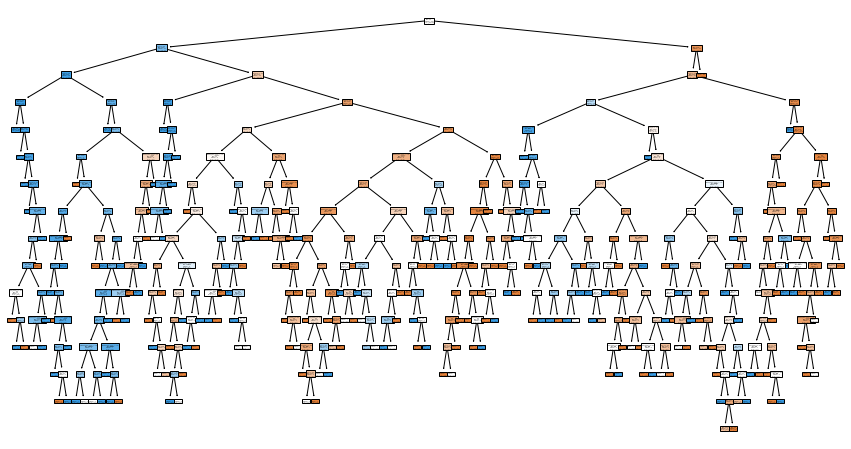

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt_clf, 
                  filled=True,
                  feature_names = X.columns)

In [49]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_test, y_test))
print(dt_clf.score(X_train, y_train))

0.9121140142517815
0.9203802733214498


- 색이 진할수록 잘 분류되었다!는것!

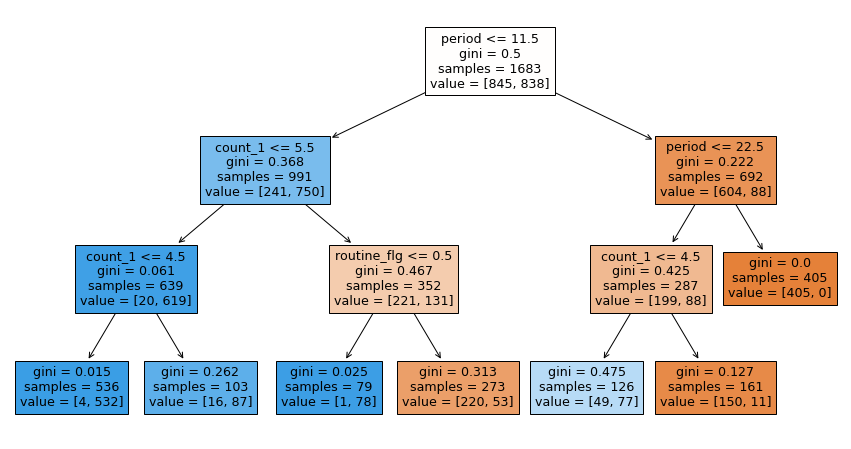

In [50]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt_clf, 
                  filled=True,
                  feature_names = X.columns)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42,max_depth=3, n_estimators = 1000 )
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))
print(rf_clf.score(X_train, y_train))

0.8907363420427553
0.916815210932858


In [52]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_test, y_test))
print(xgb.score(X_train, y_train))

0.9049881235154394
0.9714795008912656


In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))
print(svc.score(X_train, y_train))

0.8931116389548693
0.9061200237670826


In [54]:
importance = pd.DataFrame({"feature_names":X.columns, "coefficient":dt_clf.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.324029
1,routine_flg,0.120705
2,period,0.555266
3,campaign_name_입회비무료,0.000000
4,campaign_name_입회비반액할인,0.000000
5,class_name_종일,0.000000
6,class_name_주간,0.000000
7,gender_F,0.000000


In [ ]:
count_1 = 3
routing_flg = 1
period = 10
campaign_name = "입회비무료"
class_name = "종일"
gender = "M"

In [ ]:
if campaign_name == "입회비반값할인":
    campaign_name_list = [1, 0]
elif campaign_name == "입회비무료":
    campaign_name_list = [0, 1]
elif campaign_name == "일반":
    campaign_name_list = [0, 0]
if class_name == "종일":
    class_name_list = [1, 0]
elif class_name == "주간":
    class_name_list = [0, 1]
elif class_name == "야간":
    class_name_list = [0, 0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]
input_data = [count_1, routing_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

In [ ]:
print(dt_clf.predict([input_data]))
print(dt_clf.predict_proba([input_data]))

[1.]
[[0.02056962 0.97943038]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = RandomForestClassifier(random_state=0, max_depth=5)
lr_clf.fit(X_train, y_train)
print(lr_clf.score(X_test, y_test))
print(lr_clf.score(X_train, y_train))

0.8883610451306413
0.93048128342246


In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(random_state=0)
sv_clf.fit(X_train, y_train)
print(sv_clf.score(X_test, y_test))
print(sv_clf.score(X_train, y_train))

0.8836104513064132
0.9090909090909091


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
print(nb_clf.score(X_test, y_test))
print(nb_clf.score(X_train, y_train))

0.8028503562945368
0.8282828282828283
